In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

# Precipitation Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Get min and max dates of measurements
sel =  [func.min(Measurement.date), 
        func.max(Measurement.date)]
dates = session.query(*sel).all()
dates

[('2010-01-01', '2017-08-23')]

In [11]:
# Calculate the date 1 year ago from the last data point in the database
date_end = dt.datetime.strptime(dates[0][1], '%Y-%m-%d')
delta = dt.timedelta(days=365)
date_start = date_end - delta
print(date_start)
print(date_end)

2016-08-23 00:00:00
2017-08-23 00:00:00


In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=date_start).all()

precipitation[0:10]

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0)]

In [13]:
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.sort_values('date', axis=0, ascending=True, inplace=True)

# set the index to the date column
prcp_df.set_index('date', inplace=True)

# dropping null value columns
#prcp_df.dropna(inplace = True) 

prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


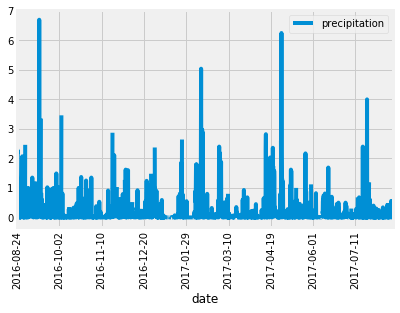

In [14]:
# Plot the data Using Pandas Matplotlib 
fig = prcp_df.plot(rot=90).get_figure()

# Save plot
fig.savefig("Images/precipitation.png", bbox_inches="tight")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
# Get min and max dates of measurements
number_station = session.query(func.count(Station.station)).all()
number_station

[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# most active station ID
station_activity[0][0]

'USC00519281'

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Get min, max and avg of temperature
sel =  [func.min(Measurement.tobs), 
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
tempature = session.query(*sel).filter(Measurement.station == station_activity[0][0]).all()
tempature

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# number of precipitation observations for each station
station_act_prcp = session.query(Measurement.station, func.count(Measurement.prcp)).\
    group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()

station_act_prcp

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [21]:
# Choose the station with the highest number of temperature observations.
station_act_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

station_act_tobs[0][0]

'USC00519281'

In [22]:
station_act_tobs_ = session.query(Measurement.station, func.max(Measurement.tobs).label('Max')).all()
station_act_tobs_

[('USC00519397', 87.0)]

In [23]:
# Query the last 12 months of temperature observation data for this station
temperature = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date>=date_start).\
    filter(Measurement.station == station_act_tobs[0][0]).all()

temperature[0:10]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0)]

In [24]:
# number of temperature observations
len(temperature)

351

In [25]:
# Save the query results as a Pandas DataFrame 
tobs_df = pd.DataFrame(temperature, columns=['date', 'temperature'])

# Sort the dataframe by date
tobs_df.sort_values('date', axis=0, ascending=True, inplace=True)

tobs_df.set_index('date', inplace=True)

tobs_df.head()

,temperature
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


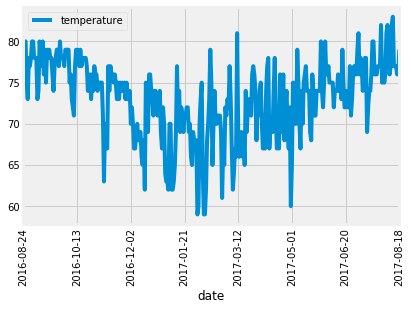

In [26]:
# plot the results 
fig = tobs_df.plot(rot=90).get_figure()

# Save plot
fig.savefig("Images/temperature.png", bbox_inches="tight")

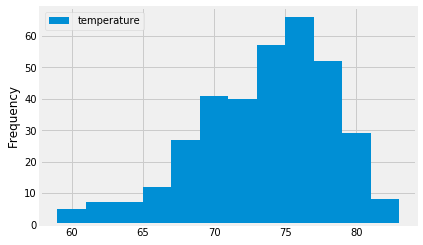

In [27]:
# plot the results as a histogram
fig = tobs_df.plot.hist(bins=12).get_figure()

# Save plot
fig.savefig("Images/temperature_hist.png", bbox_inches="tight")

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
## Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# My vacation starts 2017-08-24
d_start = date_end + dt.timedelta(days=1) - dt.timedelta(days=365)
d_end = d_start + dt.timedelta(days=14)

vacation_start = dt.datetime.strftime(d_start, '%Y-%m-%d')
vacation_end = dt.datetime.strftime(d_end, '%Y-%m-%d')
print(f'start date in the history: {vacation_start}')
print(f'end date in the history: {vacation_end}')

vacation_temp = calc_temps(vacation_start, vacation_end)
print(vacation_temp)

start date in the history: 2016-08-24
end date in the history: 2016-09-07
[(71.0, 78.03225806451613, 84.0)]


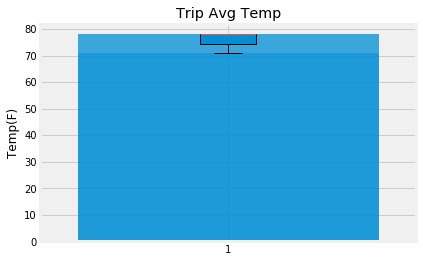

In [30]:
# Plot the results from your previous query as a bar chart. 
y_temp = [vacation_temp[0][0], vacation_temp[0][1], vacation_temp[0][1]]

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = 1

ax.boxplot(y_temp, patch_artist=True)
#ax.set_title('Trip Avg Temp')

plt.bar(x, y_temp, align='center', alpha=0.5)
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')

plt.show()

# Save plot
fig.savefig("Images/temperature_bar.png", bbox_inches="tight")

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, 
       Station.name,
       Station.latitude,
       Station.longitude,
       Station.elevation,
       func.sum(Measurement.prcp)]
total_prcp = session.query(*sel).\
        join(Station, Measurement.station == Station.station).\
        group_by(Measurement.station).\
        filter(Measurement.date >= vacation_start).filter(Measurement.date <= vacation_end).\
        order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_df = pd.DataFrame(total_prcp,columns=['station','name','latitude','longitude', 'elevation','precipitation'])
rainfall_df

,station,name,latitude,longitude,elevation,precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,11.05
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,4.12
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,3.23
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2.96
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.80
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.38
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.06


In [32]:
# list of stations
stations = session.query(Station.station).all()
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [33]:
# query for the dates and temperature observations from a year from the last data point
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date>=date_start).all()

tobs_df_hist = pd.DataFrame(tobs_data, columns=['date', 'temperature'])

# Sort the dataframe by date
tobs_df_hist.sort_values('date', axis=0, ascending=True, inplace=True)

tobs_df_hist.set_index('date', inplace=True)

# converting DataFrame to dictionaery
tobs_dict = pd.DataFrame(tobs_df_hist).to_dict()
tobs_dict

{'temperature': {'2016-08-24': 79.0,
  '2016-08-25': 77.0,
  '2016-08-26': 84.0,
  '2016-08-27': 81.0,
  '2016-08-28': 71.0,
  '2016-08-29': 78.0,
  '2016-08-30': 79.0,
  '2016-08-31': 78.0,
  '2016-09-01': 79.0,
  '2016-09-02': 81.0,
  '2016-09-03': 78.0,
  '2016-09-04': 75.0,
  '2016-09-05': 82.0,
  '2016-09-06': 78.0,
  '2016-09-07': 76.0,
  '2016-09-08': 81.0,
  '2016-09-09': 77.0,
  '2016-09-10': 78.0,
  '2016-09-11': 76.0,
  '2016-09-12': 76.0,
  '2016-09-13': 79.0,
  '2016-09-14': 76.0,
  '2016-09-15': 79.0,
  '2016-09-16': 78.0,
  '2016-09-17': 76.0,
  '2016-09-18': 75.0,
  '2016-09-19': 70.0,
  '2016-09-20': 76.0,
  '2016-09-21': 76.0,
  '2016-09-22': 79.0,
  '2016-09-23': 76.0,
  '2016-09-24': 83.0,
  '2016-09-25': 82.0,
  '2016-09-26': 77.0,
  '2016-09-27': 80.0,
  '2016-09-28': 77.0,
  '2016-09-29': 80.0,
  '2016-09-30': 80.0,
  '2016-10-01': 79.0,
  '2016-10-02': 80.0,
  '2016-10-03': 79.0,
  '2016-10-04': 79.0,
  '2016-10-05': 77.0,
  '2016-10-06': 80.0,
  '2016-10-07': 7

## Optional Challenge Assignment

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
